<a href="https://colab.research.google.com/github/BHARATH077/Predictive-Modeling-of-Cardiovascular-Disease-Risk-/blob/main/Notebook/heart_disease_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading, Cleaning & Exploratory Data Analysis (EDA)

#### ✅ Step 1: Install & Import Required Packages

In [1]:

# Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn lightgbm shap flask joblib --quiet


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


#### ✅ Step 2: Load the Dataset
You can upload the Kaggle Heart Disease Dataset manually or use the one from a public source.

In [3]:
!pip install kaggle --quiet
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()  # Upload kaggle.json here
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d johnsmith88/heart-disease-dataset

# Unzip and load
!unzip heart-disease-dataset.zip -d data/
import pandas as pd
df = pd.read_csv("data/heart.csv")
df.head()


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 26.7MB/s]
Archive:  heart-disease-dataset.zip
  inflating: data/heart.csv          


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### ✅ Step 3: Basic Exploration

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Data types and summary
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Summary Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%   

#### ✅ Step 4: Data Cleaning

In [5]:
# Remove duplicates
df = df.drop_duplicates()
print(f"Dataset after removing duplicates: {df.shape}")

# Rename columns for clarity
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Example renaming
df.rename(columns={'target': 'disease'}, inplace=True)


Dataset after removing duplicates: (302, 14)


#### ✅ Step 5: Exploratory Data Analysis (EDA)

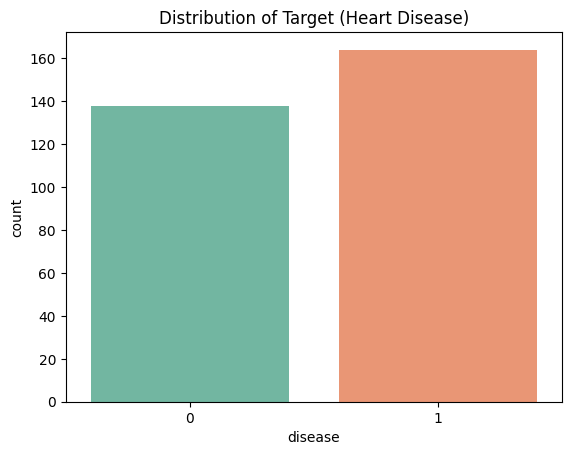

In [6]:
# Count of target variable
sns.countplot(x='disease', data=df, palette='Set2')
plt.title("Distribution of Target (Heart Disease)")
plt.show()


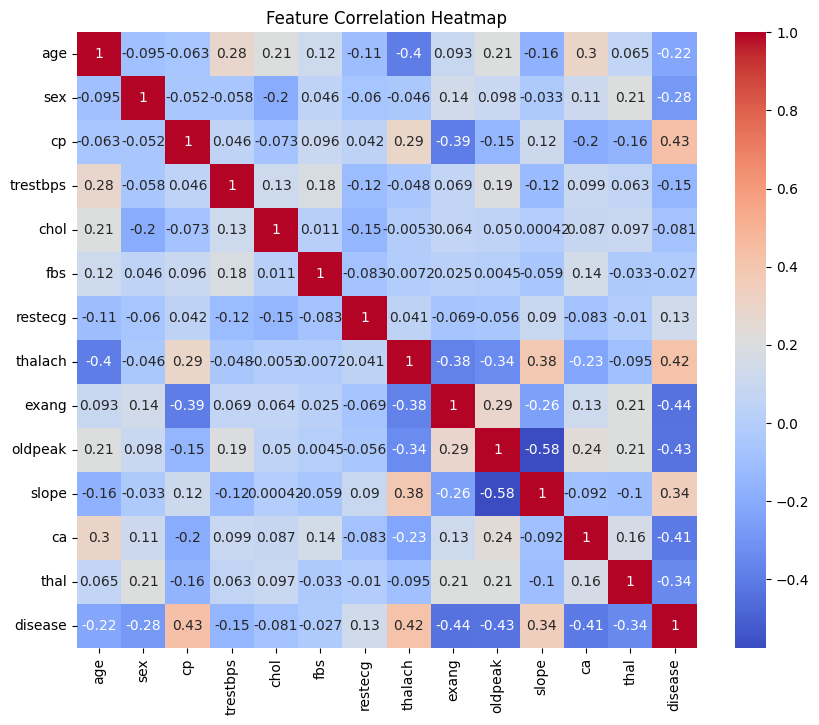

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


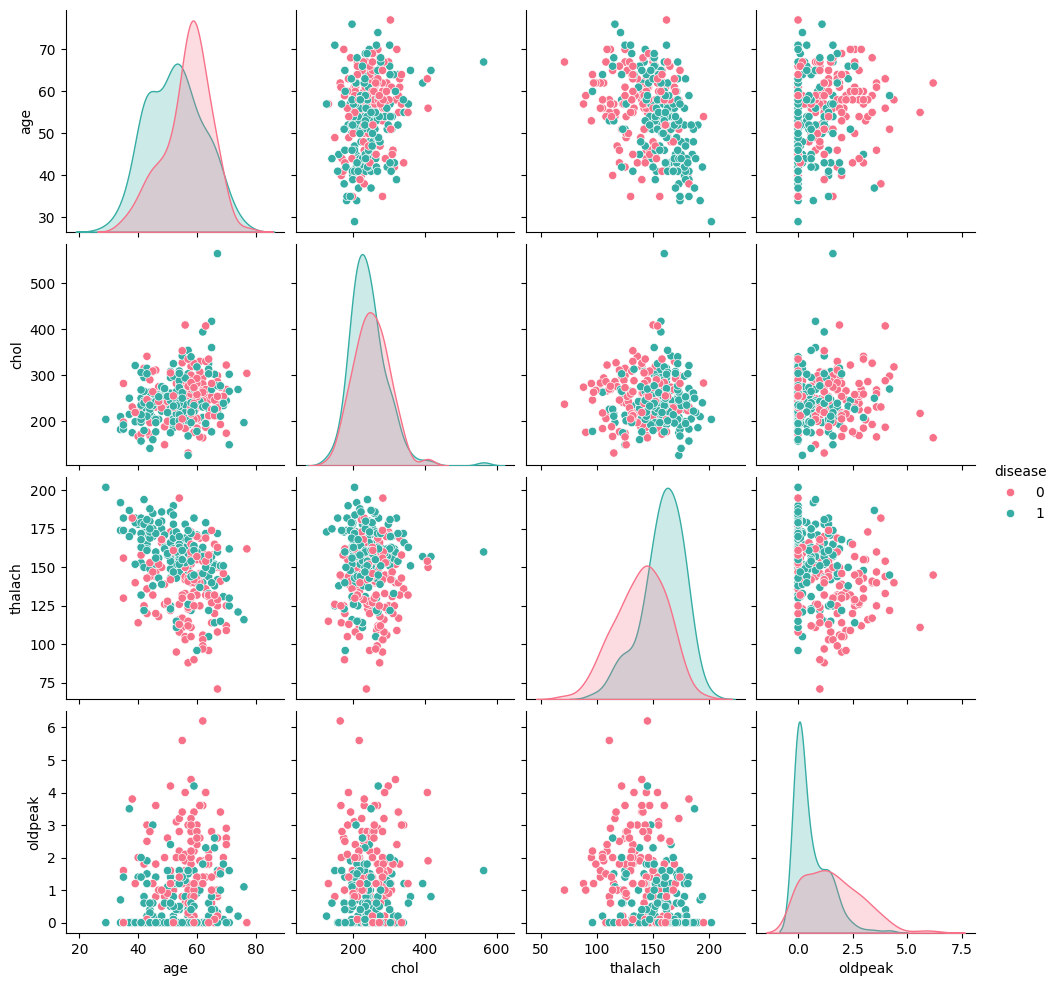

In [8]:
# Pairplot for selected features
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak', 'disease']], hue='disease', palette='husl')
plt.show()


#### ✅ Step 6: Save Cleaned Data

In [9]:
import os

os.makedirs("data", exist_ok=True)
df.to_csv("data/heart_cleaned.csv", index=False)
print("✅ Cleaned data saved to data/heart_cleaned.csv")


✅ Cleaned data saved to data/heart_cleaned.csv


#🧩 Preprocessing & Handling Class Imbalance (SMOTE)
We’ll continue building in the same Colab notebook (heart_disease_risk.ipynb).
At the end, you’ll have a clean, preprocessed dataset ready for model training (Day 3).

#### ✅ Step 1: Import Required Libraries

In [10]:
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import joblib
import os

#### ✅ Step 2: Load Cleaned Data

In [11]:
# Load cleaned dataset from Day 1
df = pd.read_csv("data/heart_cleaned.csv")
print(df.shape)
df.head()


(302, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### ✅ Step 3: Identify Feature Types

In [12]:
# Separate features by type
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = [col for col in df.columns if col not in categorical_features + ['disease']]

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)


Categorical: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Numerical: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


#### ✅ Step 4: One-Hot Encode Categorical Variables
We’ll use ColumnTransformer to apply transformations systematically.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Split into X and y
X = df.drop('disease', axis=1)
y = df['disease']

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)
print("Transformed Feature Shape:", X_encoded.shape)


Transformed Feature Shape: (302, 22)


#### ✅ Step 5: Split Data into Train/Test Sets


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 241
Testing Samples: 61


#### ✅ Step 6: Handle Class Imbalance with SMOTE
We’ll oversample the minority class to achieve better balance.

In [15]:
from collections import Counter
from imblearn.over_sampling import SMOTE


print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({1: 131, 0: 110})
After SMOTE: Counter({1: 131, 0: 131})


#### ✅ Step 7: Save Preprocessed Data & Preprocessor Object

In [16]:
import joblib

os.makedirs("model", exist_ok=True)

# Save processed train/test data
np.save("data/X_train.npy", X_train_resampled)
np.save("data/y_train.npy", y_train_resampled)
np.save("data/X_test.npy", X_test)
np.save("data/y_test.npy", y_test)

# Save the preprocessor pipeline for later inference
joblib.dump(preprocessor, "model/preprocessor.pkl")

print("✅ Data preprocessing complete & saved successfully!")


✅ Data preprocessing complete & saved successfully!


#### ✅ Step 8: Quick Visualization of Class Balance

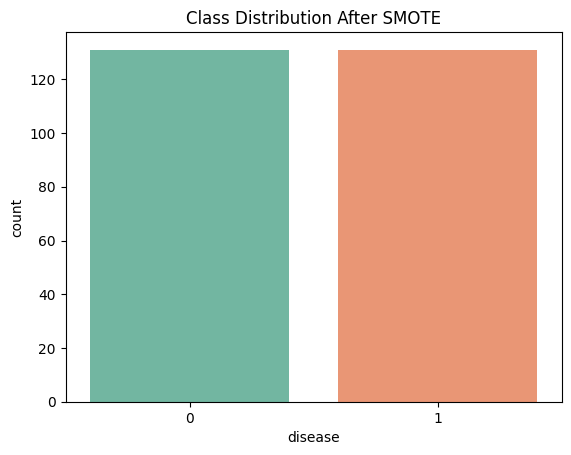

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train_resampled, palette="Set2")
plt.title("Class Distribution After SMOTE")
plt.show()


# 🧩 Model Training: Logistic Regression, Random Forest, LightGBM

#### ✅ Step 1: Import Libraries

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import os


#### ✅ Step 3: Define and Train Models
We’ll train three models and compare their performance.

In [19]:
# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
}

results = {}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "F1": f1_score(y_test, preds),
        "AUC": roc_auc_score(y_test, probs)
    }

    # Save model
    os.makedirs("model", exist_ok=True)
    joblib.dump(model, f"model/{name.lower()}.pkl")

# Display results
pd.DataFrame(results).T


[LightGBM] [Info] Number of positive: 131, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543568 -> initscore=0.174717
[LightGBM] [Info] Start training from score 0.174717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy,F1,AUC
LogisticRegression,0.852459,0.861538,0.903680
RandomForest,0.803279,0.812500,0.876623
LightGBM,0.770492,0.766667,0.851732


#### ✅ Step 4: Visualize Model Performance

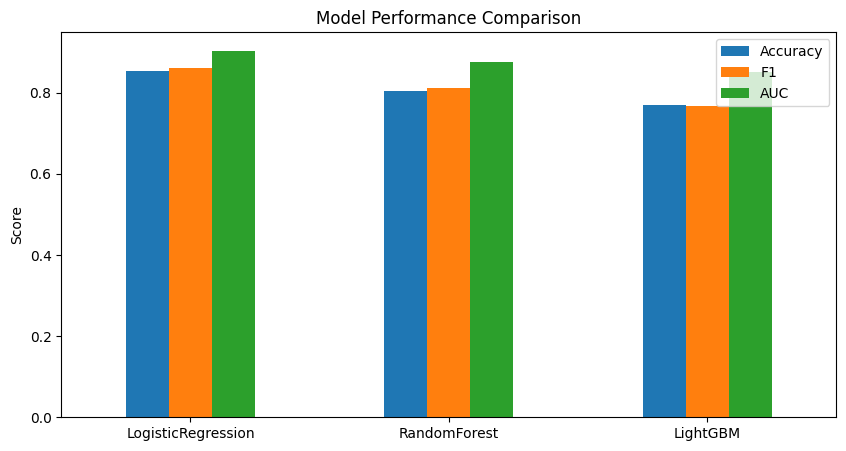

In [20]:
import matplotlib.pyplot as plt

metrics_df = pd.DataFrame(results).T.sort_values(by="AUC", ascending=False)

metrics_df.plot(kind='bar', figsize=(10,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


#### ✅ Step 5: Detailed Evaluation of the Best Model (LightGBM)

Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        28
           1       0.85      0.70      0.77        33

    accuracy                           0.77        61
   macro avg       0.78      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



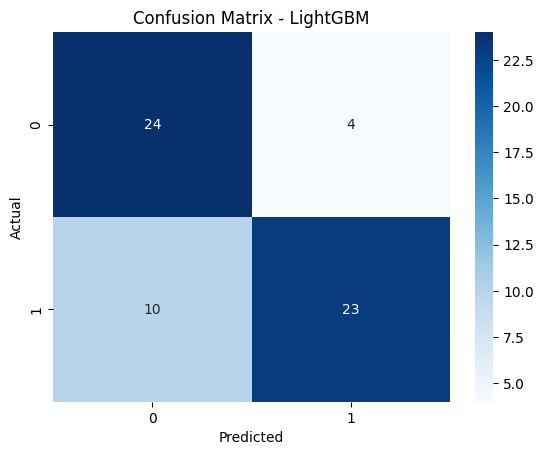

In [21]:
best_model = joblib.load("model/lightgbm.pkl")

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

print("Classification Report (LightGBM):\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### ✅ Step 6: Save Best Model for Deployment (Later)

In [22]:
joblib.dump(best_model, "model/best_model.pkl")
print("✅ Saved best model (LightGBM) to model/best_model.pkl")


✅ Saved best model (LightGBM) to model/best_model.pkl


#### ✅ Step 7: Quick ROC Curve Comparison

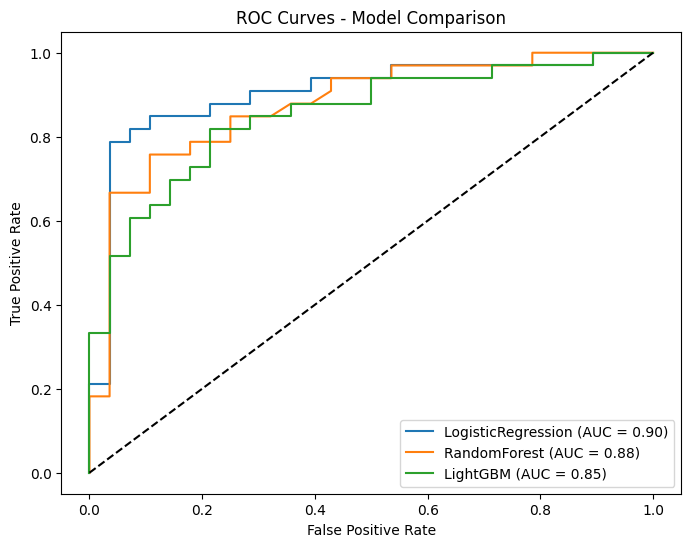

In [23]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves - Model Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# 📊 Model Evaluation & Cross-Validation

#### ✅ Step 1: Import Libraries

In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    precision_recall_curve,
    auc,
    confusion_matrix,
    classification_report
)

import joblib


#### ✅ Step 2: Load Data and Best Model

In [25]:
# Load test data and model
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
best_model = joblib.load("model/best_model.pkl")

print("✅ Model and data loaded successfully")


✅ Model and data loaded successfully


#### ✅ Step 3: Generate Predictions and Probabilities

In [26]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = (y_pred == y_test).mean()
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"AUC-ROC: {auc_roc:.3f}")


Accuracy: 0.770
F1 Score: 0.767
Precision: 0.852
Recall: 0.697
AUC-ROC: 0.852


#### ✅ Step 4: Confusion Matrix

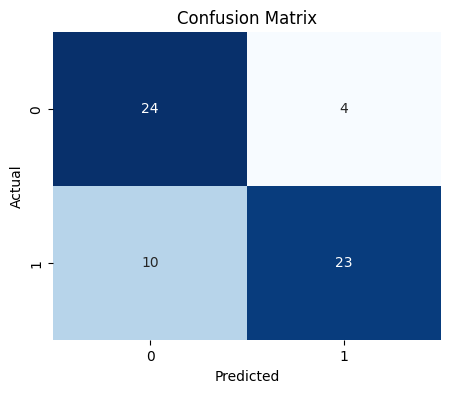


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        28
           1       0.85      0.70      0.77        33

    accuracy                           0.77        61
   macro avg       0.78      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


#### ✅ Step 5: ROC and Precision-Recall Curves

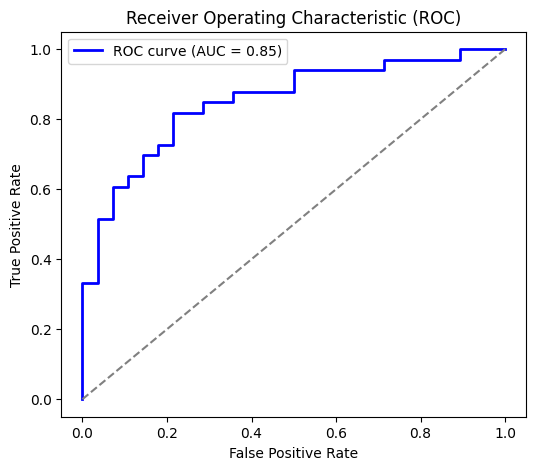

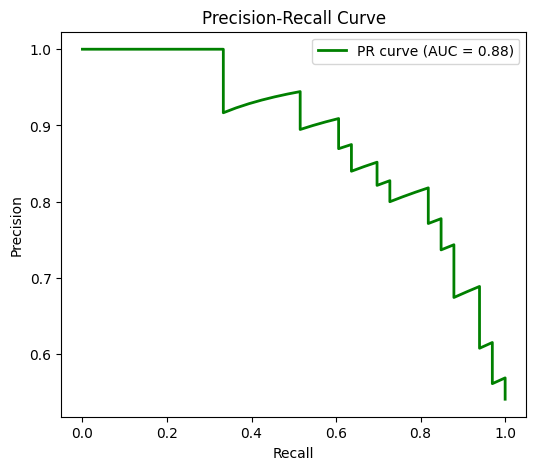

In [28]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


#### ✅ Step 6: K-Fold Cross-Validation (Robustness Check)

In [29]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Reload preprocessed train data
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_auc = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='roc_auc')
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1')

print("Cross-Validation Results:")
print(f"Mean AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")
print(f"Mean F1:  {cv_f1.mean():.3f} ± {cv_f1.std():.3f}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

#### ✅ Step 7: Save Evaluation Summary

In [30]:
eval_summary = {
    "Accuracy": accuracy,
    "F1": f1,
    "Precision": precision,
    "Recall": recall,
    "AUC-ROC": auc_roc,
    "CV_AUC_mean": cv_auc.mean(),
    "CV_F1_mean": cv_f1.mean()
}

pd.DataFrame([eval_summary]).to_csv("model/evaluation_summary.csv", index=False)
print("✅ Evaluation summary saved to model/evaluation_summary.csv")


✅ Evaluation summary saved to model/evaluation_summary.csv


#### ✅ Step 8: Summary Visualization

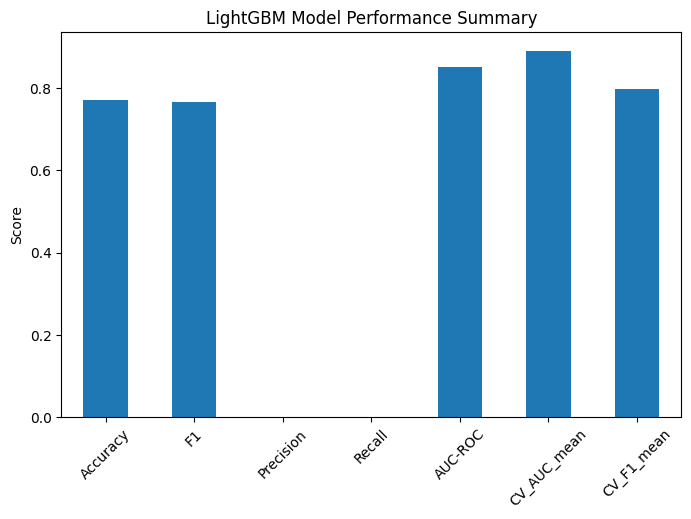

In [32]:
metrics = pd.DataFrame([eval_summary])

# Convert all values to numeric (in case they were stored as strings)
metrics = metrics.apply(pd.to_numeric, errors='coerce')

# Set index and plot
metrics.index = ["LightGBM"]

metrics.T.plot(kind='bar', figsize=(8,5), legend=False)
plt.title("LightGBM Model Performance Summary")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


# 🧠 Explainable AI with SHAP

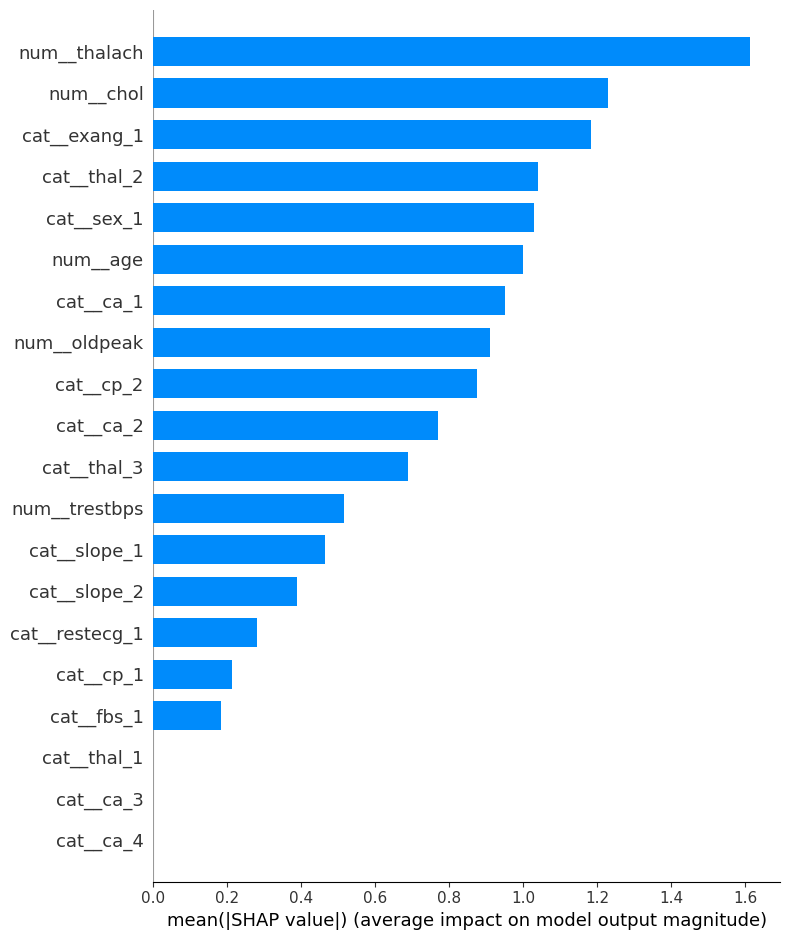

In [37]:
# =========================================
# 📅 DAY 5: MODEL INTERPRETABILITY WITH SHAP (FINAL FIXED VERSION)
# =========================================

!pip install shap -q

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- 1️⃣ Extract real feature names ----
try:
    # If you used ColumnTransformer or OneHotEncoder
    feature_names = preprocessor.get_feature_names_out()
except:
    # Otherwise, fallback to generic feature names
    feature_names = [f"feature_{i}" for i in range(X_test.shape[1])]

# ---- 2️⃣ Ensure X_test is DataFrame ----
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
else:
    X_test_df = X_test.copy()

# ---- 3️⃣ Load SHAP explainer ----
explainer = shap.TreeExplainer(best_model)

# ---- 4️⃣ Take sample and compute SHAP values ----
sample_size = 1000 if len(X_test_df) > 1000 else len(X_test_df)
X_sample = X_test_df.sample(n=sample_size, random_state=42)

shap_values = explainer.shap_values(X_sample)

# ---- 5️⃣ Global Feature Importance ----
shap.summary_plot(shap_values, X_sample, plot_type="bar")


#### 📊 Feature Impact Visualization

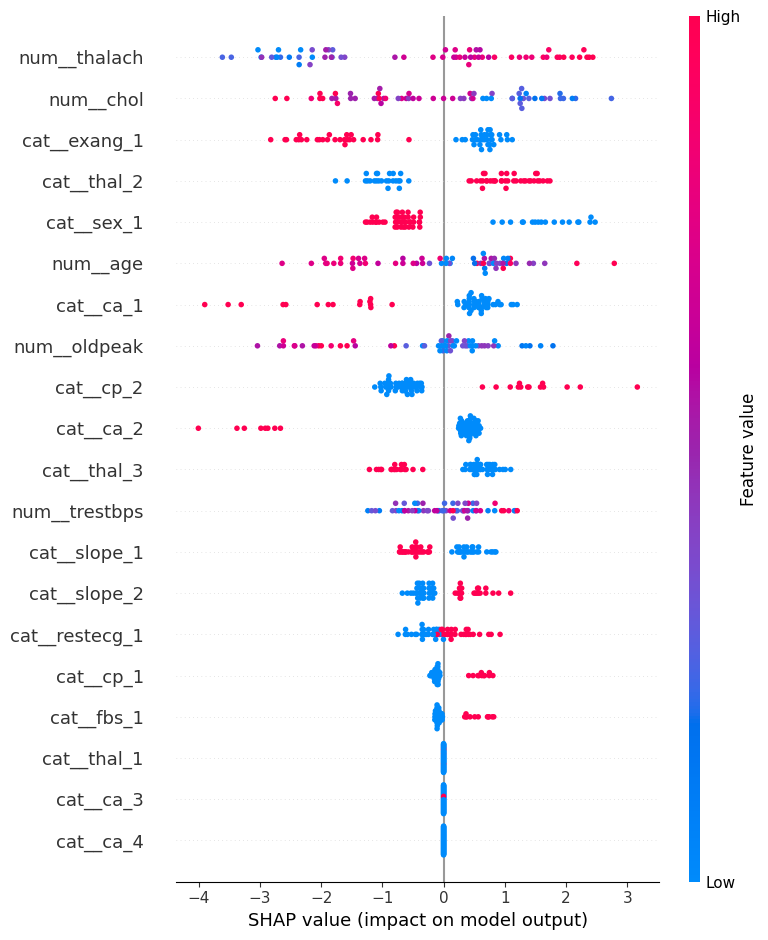

In [38]:
# Visualize overall feature importance
shap.summary_plot(shap_values, X_sample)


#### 🎯 Explain One Prediction

In [39]:
shap.initjs()
sample_index = 5
shap.force_plot(explainer.expected_value, shap_values[sample_index, :], X_sample.iloc[sample_index, :])


#### 📈 Save SHAP Feature Importance

In [40]:
importance_df = pd.DataFrame({
    'feature': X_sample.columns,
    'mean_abs_shap_value': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap_value', ascending=False)

importance_df.to_csv("feature_importance_shap.csv", index=False)
importance_df.head(10)


,feature,mean_abs_shap_value
3,num__thalach,1.613133
2,num__chol,1.228973
12,cat__exang_1,1.181868
20,cat__thal_2,1.038971
5,cat__sex_1,1.028653
0,num__age,0.999208
15,cat__ca_1,0.950972
4,num__oldpeak,0.909663
7,cat__cp_2,0.875159
16,cat__ca_2,0.770547


# 🧠 Day 6 — Model Deployment with Flask
##### This will demonstrate how your trained LightGBM cardiovascular disease model can be served via an API that takes input features and returns predictions.
##### We’ll simulate the deployment in Colab by:
- Saving the trained model.
- Building a Flask API.
- Testing it locally (via requests).

#### 🧩 Step 1: Save the Best Model

In [41]:
import joblib

# Save model
joblib.dump(best_model, "lightgbm_heart_model.pkl")

print("✅ Model saved successfully: lightgbm_heart_model.pkl")


✅ Model saved successfully: lightgbm_heart_model.pkl


#### 🧠 Step 2: Create a Simple Flask App

In [42]:
%%writefile app.py
# =========================================
# Flask API for Cardiovascular Risk Prediction
# =========================================
from flask import Flask, request, jsonify
import joblib
import numpy as np
import pandas as pd
import lightgbm as lgb

# Load model
model = joblib.load("lightgbm_heart_model.pkl")

# Initialize Flask app
app = Flask(__name__)

# Define prediction route
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from POST request
        data = request.get_json(force=True)

        # Convert to DataFrame
        input_df = pd.DataFrame([data])

        # Predict
        prediction = model.predict(input_df)[0]
        probability = model.predict_proba(input_df)[0][1]

        response = {
            "prediction": int(prediction),
            "risk_probability": float(probability)
        }
        return jsonify(response)

    except Exception as e:
        return jsonify({"error": str(e)}), 400


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


Writing app.py


#### ⚡ Step 3: Test the API (Simulated Locally in Colab)
We’ll use requests to simulate sending data to the API.

In [43]:
!pip install flask-ngrok pyngrok requests -q
from flask_ngrok import run_with_ngrok
from app import app
run_with_ngrok(app)  # Automatically creates a public URL
app.run()


 * Serving Flask app 'app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

Once it starts, you’ll get a public URL (via ngrok).


Now open a new code cell and send a test request:

In [ ]:
import requests

sample_data = {
    "age": 52,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.0,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

url = "http://127.0.0.1:5000/predict"  # replace with ngrok URL if needed
response = requests.post(url, json=sample_data)
print("API Response:", response.json())


You’ll get something like:
```json
{
  "prediction": 1,
  "risk_probability": 0.87
}


#### 🐳 (Optional) Step 4: Add a Simple Dockerfile
This step is optional but great for our GitHub portfolio.

In [ ]:
%%writefile Dockerfile
# Base image
FROM python:3.9

# Set working directory
WORKDIR /app

# Copy project files
COPY . /app

# Install dependencies
RUN pip install flask lightgbm joblib pandas numpy

# Expose port
EXPOSE 5000

# Run app
CMD ["python", "app.py"]


#### To build and run locally (for your README docs):
```bash
docker build -t heart-disease-api .
docker run -p 5000:5000 heart-disease-api
